In [8]:
# Installing `caer` and `canaro` since they don't come pre-installed
!pip install --upgrade caer canaro

In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [10]:
!kaggle datasets download alexattia/the-simpsons-characters-dataset

100% 1.08G/1.08G [00:58<00:00, 22.3MB/s]
100% 1.08G/1.08G [00:58<00:00, 19.9MB/s]


In [11]:
!unzip '/content/the-simpsons-characters-dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pi

In [12]:
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [13]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/content/simpsons_dataset'

List of all character involved in

In [14]:
# Creating a character dictionary, sorting it in descending order
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

# Sort in descending order
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_

In [15]:
#  Getting the first 10 categories with the most number of images
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [16]:
# Create the training data
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.011465311050415039s
[INFO] At 1000 files
[INFO] 1454 files found in 0.0032072067260742188s
[INFO] At 1000 files
[INFO] 1452 files found in 0.0030820369720458984s
[INFO] At 1000 files
[INFO] 1354 files found in 0.003214120864868164s
[INFO] At 1000 files
[INFO] 1342 files found in 0.002866983413696289s
[INFO] At 1000 files
[INFO] 1291 files found in 0.002812623977661133s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0030090808868408203s
[INFO] At 1000 files
[INFO] 1194 files found in 0.002569913864135742s
[INFO] At 1000 files
[INFO] 1193 files found in 0.002701997756958008s
[INFO] At 1000 files
[INFO] 1079 files found in 0.004032611846923828s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 31s


In [17]:
# Number of training samples
len(train)

13811

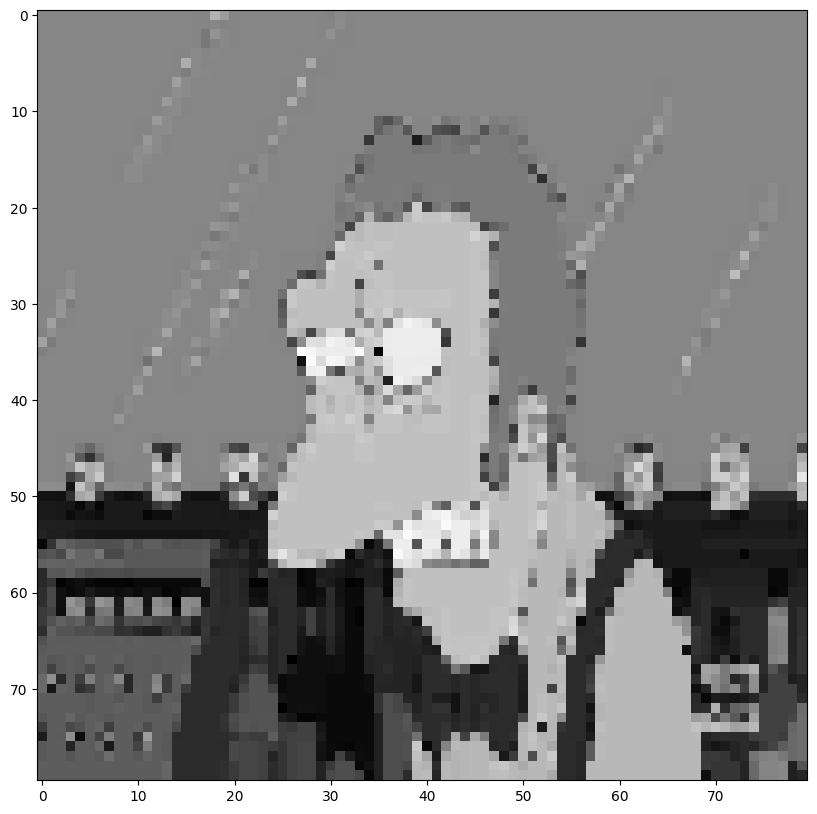

In [18]:
# Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [19]:
# Separating the array and corresponding labels
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

In [20]:
from tensorflow.keras.utils import to_categorical

# Normalize the featureSet ==> (0,1)
featureSet = caer.normalize(featureSet)
# Converting numerical labels to binary class vectors
labels = to_categorical(labels, len(characters))

In [21]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)

In [22]:
del train
del featureSet
del labels
gc.collect()

0

In [23]:
# Useful variables when training
BATCH_SIZE = 32
EPOCHS = 10

In [24]:
# Image data generator (introduces randomness in network ==> better accuracy)
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [25]:
# # Create our model (returns a compiled model)
# model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters),
#                                          loss='binary_crossentropy', decay=1e-6, learning_rate=0.001, momentum=0.9,
#                                          nesterov=True)

In [26]:
#Create the model with updated optimizer syntax
import tensorflow as tf
from tensorflow.keras import layers, models

In [27]:

#Create the model
model = models.Sequential()
#Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80, 80, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into dense layers
model.add(layers.Flatten())
#Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='sigmoid'))  # Using sigmoid for binary classification
#Compile the model


In [28]:
learning_rate = 0.001
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 128)        0

In [59]:
from tensorflow.keras.utils import plot_model

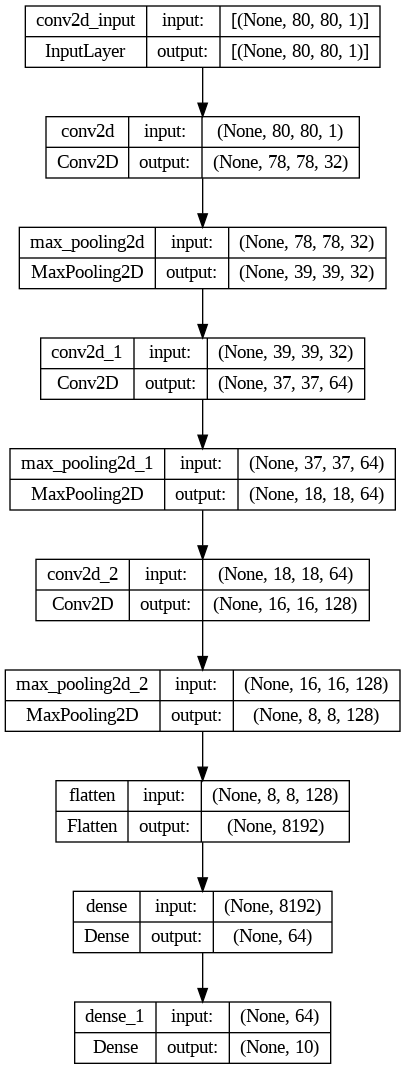

In [60]:
plot_model(model, to_file='model_architecture.png', show_shapes=True)

In [30]:
# Training the model

from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
343/345 [============================>.] - ETA: 0s - loss: 0.3408 - accuracy: 0.1589

345/345 [==============================] - 24s 32ms/step - loss: 0.3407 - accuracy: 0.1590 - val_loss: 0.3245 - val_accuracy: 0.1491 - lr: 0.0100
Epoch 2/10
345/345 [==============================] - 9s 26ms/step - loss: 0.3225 - accuracy: 0.1667 - lr: 0.0100
Epoch 3/10
345/345 [==============================] - 10s 29ms/step - loss: 0.3201 - accuracy: 0.1683 - lr: 0.0100
Epoch 4/10
345/345 [==============================] - 10s 28ms/step - loss: 0.3134 - accuracy: 0.1999 - lr: 0.0100
Epoch 5/10
345/345 [==============================] - 10s 28ms/step - loss: 0.3086 - accuracy: 0.2246 - lr: 0.0100
Epoch 6/10
345/345 [==============================] - 10s 28ms/step - loss: 0.3041 - accuracy: 0.2463 - lr: 0.0100
Epoch 7/10
345/345 [==============================] - 9s 25ms/step - loss: 0.3008 - accuracy: 0.2605 - lr: 0.0100
Epoch 8/10
345/345 [==============================] - 11s 32ms/step - loss: 0.2978 - accuracy: 0.2839 - lr: 0.0100
Epoch 9/10
345/345 [==============================]

In [31]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

## Testing

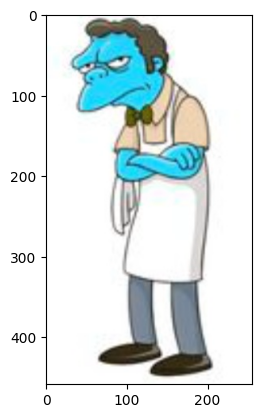

In [54]:
test_path = r'/content/simpsons_dataset/moe_szyslak/pic_0003.jpg'
img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [51]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [55]:
predictions = model.predict(prepare(img))

1/1 [==============================] - 0s 19ms/step


In [56]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

moe_szyslak
